Test of significance

Question 1

In [1]:
import numpy as np
import scipy.stats as stats

mu_0 = 35 
x_bar = 33 
sigma = 5  
n = 40  
z = (x_bar - mu_0) / (sigma / np.sqrt(n))
p_value = stats.norm.cdf(z)
critical_value = stats.norm.ppf(0.05)  # Left-tailed test
print(f"Z-test statistic: {z:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Critical value: {critical_value:.4f}")

if z < critical_value:
    print("Reject the null hypothesis: The average assembly time has significantly decreased.")
else:
    print("Fail to reject the null hypothesis: No significant decrease in assembly time.")


Z-test statistic: -2.5298
P-value: 0.0057
Critical value: -1.6449
Reject the null hypothesis: The average assembly time has significantly decreased.


Question 2

In [2]:
mu_0 = 25  
x_bar = 27 
s = 4.5  
n = 15  
t = (x_bar - mu_0) / (s / np.sqrt(n))
p_value = 1 - stats.t.cdf(t, df=n-1)  
critical_value = stats.t.ppf(0.95, df=n-1)  
print(f"T-test statistic: {t:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Critical value: {critical_value:.4f}")
if t > critical_value:
    print("Reject the null hypothesis: Graduate students study more than 25 hours on average.")
else:
    print("Fail to reject the null hypothesis: No evidence that graduate students study more than 25 hours.")


T-test statistic: 1.7213
P-value: 0.0536
Critical value: 1.7613
Fail to reject the null hypothesis: No evidence that graduate students study more than 25 hours.


Regression

In [ ]:
Question a

In [9]:
# Import necessary libraries
import pandas as pd             
import statsmodels.api as sm     

# Define the dataset
data = {
    "Hours of Study": [
        5, 5, 7, 3, 0, 5, 2, 7, 4, 2, 1, 6, 8, 5, 7,
        8, 7, 8, 8, 0, 8, 7, 4, 6, 7, 2, 0, 8, 4, 7
    ],
    "Score": [
        52.1221, 52.1221, 72.1221, 32.1221, 2.122104, 52.1221, 22.1221,
        72.1221, 42.1221, 22.1221, 12.1221, 62.1221, 82.1221, 52.1221,
        72.1221, 82.1221, 72.1221, 82.1221, 82.1221, 2.122104, 82.1221,
        72.1221, 42.1221, 62.1221, 72.1221, 22.1221, 2.122104, 82.1221, 42.1221, 72.1221
    ]
}

# Convert the data dictionary into a pandas DataFrame for easier handling
df = pd.DataFrame(data)

# Define independent variable (X) and dependent variable (Y)
X = df["Hours of Study"]           
Y = df["Score"]                    

# Add a constant term to X for the intercept in the regression model
X = sm.add_constant(X)             # This step ensures we have an intercept in the model

# Fit the linear regression model using Ordinary Least Squares (OLS) method
model = sm.OLS(Y, X).fit()         # This creates and fits the model to our data

# Extract the intercept and slope from the model parameters
intercept = model.params['const']            # Intercept (constant term)
slope = model.params['Hours of Study']       # Slope (coefficient for Hours of Study)

# regression 
print(f"Regression equation: Y = {intercept:.3f} + {slope:.3f}X")


Regression equation: Y = 2.122 + 10.000X


Question b


Regression equation: Score = 2.1221 + 10.0000 * Hours of Study


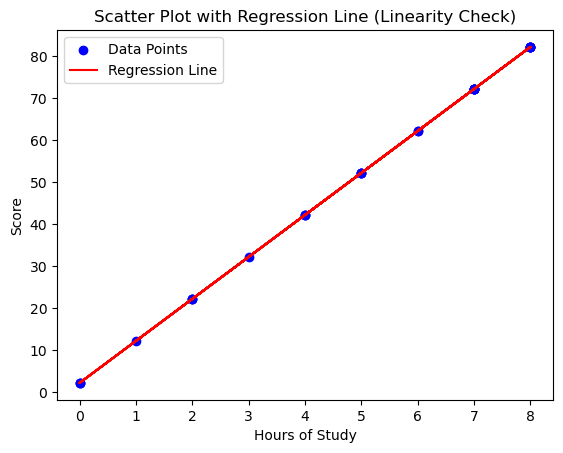

Durbin-Watson Statistic: 1.9993
Residuals are likely independent (no significant autocorrelation).


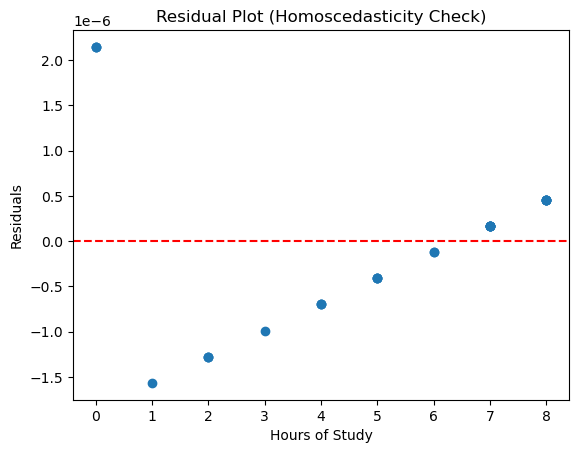

Shapiro-Wilk Test p-value: 0.0074
Residuals may not be normally distributed.


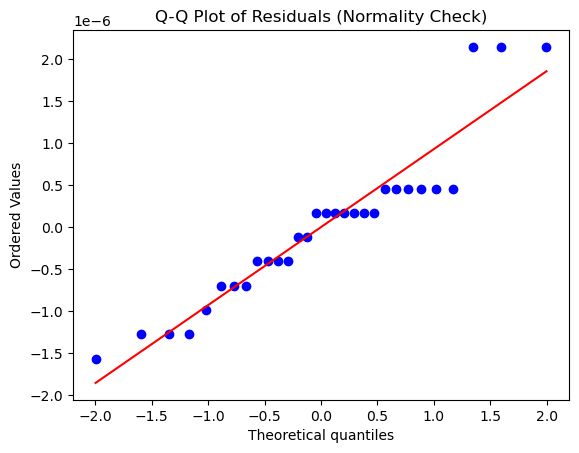

In [14]:
# Importing necessary libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, probplot

# Define dataset with 'Hours of Study' and 'Score' data
data = {
    "Hours of Study": [
        5, 5, 7, 3, 0, 5, 2, 7, 4, 2, 1, 6, 8, 5, 7,
        8, 7, 8, 8, 0, 8, 7, 4, 6, 7, 2, 0, 8, 4, 7
    ],
    "Score": [
        52.1221, 52.1221, 72.1221, 32.1221, 2.122104, 52.1221, 22.1221,
        72.1221, 42.1221, 22.1221, 12.1221, 62.1221, 82.1221, 52.1221,
        72.1221, 82.1221, 72.1221, 82.1221, 82.1221, 2.122104, 82.1221,
        72.1221, 42.1221, 62.1221, 72.1221, 22.1221, 2.122104, 82.1221, 42.1221, 72.1221
    ]
}

# Load data into a pandas DataFrame
df = pd.DataFrame(data)

# Separate the independent variable (X) and dependent variable (y)
X = df["Hours of Study"]
y = df["Score"]

# Add a constant to the independent variable
X_const = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X_const).fit()
y_pred = model.predict(X_const)

# Display the regression equation
intercept = model.params['const']
slope = model.params['Hours of Study']
print(f"Regression equation: Score = {intercept:.4f} + {slope:.4f} * Hours of Study")

# Calculate residuals
residuals = y - y_pred

# Linearity check with scatter plot and regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel("Hours of Study")
plt.ylabel("Score")
plt.title("Scatter Plot with Regression Line (Linearity Check)")
plt.legend()
plt.show()

# Independence of residuals: Calculate Durbin-Watson statistic
dw_value = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_value:.4f}")
if dw_value < 1.5:
    print("Possible positive autocorrelation in residuals.")
elif dw_value > 2.5:
    print("Possible negative autocorrelation in residuals.")
else:
    print("Residuals are likely independent (no significant autocorrelation).")

# Homoscedasticity check: Plot residuals against Hours of Study
plt.scatter(X, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Hours of Study")
plt.ylabel("Residuals")
plt.title("Residual Plot (Homoscedasticity Check)")
plt.show()

#  Normality of residuals check: Shapiro-Wilk test and Q-Q plot
# Perform Shapiro-Wilk test
shapiro_stat, shapiro_p = shapiro(residuals)
print(f"Shapiro-Wilk Test p-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("Residuals are likely normally distributed.")
else:
    print("Residuals may not be normally distributed.")

# Q-Q plot for visual confirmation of normality
plt.figure()
probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (Normality Check)")
plt.show()


Linearity: The residual plot shows if there is a linear relationship between hours studied and scores. If residuals are randomly scattered around zero without a pattern, linearity is likely satisfied.
Homoscedasticity: This means that residuals should have constant variance across all values of XX. The residual plot also helps here—if residuals maintain a consistent spread across the range of study hours, homoscedasticity holds.
Normality of Residuals: We plot a histogram of residuals to check for a normal distribution. If residuals are normally distributed, the model’s predictions are generally reliable.

Question c

In [ ]:
import numpy as np

# Calculate residuals
residuals = y - model.predict(X)

# Add residuals and Z-score for each point to the DataFrame
df['Residuals'] = residuals
df['Z_score'] = np.abs((df['Residuals'] - df['Residuals'].mean()) / df['Residuals'].std())

# Identify outliers based on Z-score > 3
outliers = df[df['Z_score'] > 3]
print("Outliers based on Z-score:")
print(outliers)


The **Z-score method** identifies outliers by checking how much each data point’s residual (difference between observed and predicted values) deviates from the average. We calculate Z-scores for each residual; if a Z-score is above 3, it’s flagged as an outlier, meaning it deviates significantly from the general pattern. These outliers can impact the regression model by skewing the slope and intercept, so identifying them helps us decide whether they should stay in the analysis or be further investigated.

Question d

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

# Define MSE as scoring metric for cross-validation
mse_scorer = make_scorer(mean_squared_error)

# Perform 5-fold cross-validation to get average MSE and R-squared
cv_mse = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-Validated Mean Squared Error:", cv_mse.mean())
print("Cross-Validated R-squared:", cv_r2.mean())


Cross-Validation Process: We split the data into five parts. The model is trained on four parts and tested on the fifth, repeating this process five times so each part is tested once.
Metrics: We calculate the Mean Squared Error (MSE) and R-squared for each fold, then average them. A lower MSE means the model’s predictions are close to actual values, and a higher R-squared shows the model explains a large portion of the variance in scores.

Cross-validation provides a more reliable evaluation of the model’s performance and helps confirm that it can make accurate predictions on new data.

Linear Optimization

a

Let:
X1represent the number of units of Product A produced per week
X2represent the number of units of Product B produced per week
X3represent the number of units of Product C produced per week
Objective Function:
Maximize Z=X1+X2+X3Subject to Constraints:

Machine X Hours:
    2x1+x2+3x3≤100
    

Machine Y Hours:
    4x1+3x2+2x3≤85
  
 Non-negativity Constraints:
    x1,x2,x3≥0
   


In [ ]:
b

In [ ]:
# Import necessary function from scipy.optimize
from scipy.optimize import linprog

# Coefficients for the objective function (maximize x1 + x2 + x3, hence minimize -x1 - x2 - x3)
objective_coeffs = [-1, -1, -1]

# Define the inequality constraint matrix and vector
# Each row represents the coefficients for the constraints on Machine X and Machine Y, respectively.
constraints_matrix = [
    [2, 1, 3],  # Machine X usage per product
    [4, 3, 2]   # Machine Y usage per product
]

# Define the right-hand side of the inequality constraints (available hours for each machine)
constraints_rhs = [100, 85]

# Set bounds for each variable (non-negativity constraint: each product's production must be >= 0)
variable_bounds = [(0, None), (0, None), (0, None)]

# Solve the linear programming problem using the simplex method
solution = linprog(
    c=objective_coeffs,
    A_ub=constraints_matrix,
    b_ub=constraints_rhs,
    bounds=variable_bounds,
    method='simplex'
)

# Check if the solver found an optimal solution
if solution.success:
    print("Optimal solution identified!")
    print(f"Product A units (x1): {solution.x[0]:.2f}")
    print(f"Product B units (x2): {solution.x[1]:.2f}")
    print(f"Product C units (x3): {solution.x[2]:.2f}")
    print(f"Maximum total production output: {-solution.fun:.2f}")  # Negate to convert minimization result to maximization
else:
    print("Optimization was unsuccessful:", solution.message)


In [ ]:
c

To determine whether Machine X or Machine Y is the limiting factor, we need to look at which machine’s hours are fully utilized in the optimal production plan. In linear programming, a constraint is considered *binding* if it reaches its maximum capacity in the solution. In other words, if one machine’s hours are fully used up, it restricts the total production capacity, making it the bottleneck.

Analysis

In this problem:
- Machine X has a limit of 100 hours per week.
- Machine Y has a limit of 85 hours per week.
  
When we solve the linear programming problem, we’ll get optimal production levels for Products A, B, and C. With these values, we can calculate the total hours used on each machine and see if either machine’s usage exactly matches its capacity.

1. **If Machine X’s hours are fully used** (totaling exactly 100 hours), then Machine X is the constraint that limits further production. This would mean Machine X is the bottleneck.
2. **If Machine Y’s hours are fully used** (totaling exactly 85 hours), then Machine Y is the limiting factor, and it’s Machine Y that restricts the production potential.

Decision on Upgrading

- If Machine X is the limiting factor (fully utilized), upgrading Machine X by adding more hours would allow us to increase production.
- If Machine Y is the limiting factor, increasing its hours would help increase output.

Conclusion

To maximize production, we should upgrade the machine that’s fully utilized in the optimal solution. By removing the bottleneck, we allow the system to produce more overall, making the upgrade more effective.